### Sentiment alanysis

In [ ]:
import numpy as np
import pandas as pd

# 1 Load the imdb dataset
df = pd.read_csv('imdb/IMDB Dataset.csv')
df.sample(5)

,review,sentiment
29648,"so... it's really sexist, and classist, and i ...",negative
35842,Uncle Frank is everyone's uncle. This document...,positive
28870,"Agreeable ""Boy's Own Paper"" nonsense with a sp...",positive
8461,The movie within the movie - a concept done ma...,positive
35240,Don't get me wrong this was fun to watch. It h...,positive


In [3]:
# 2 Data Cleaning and Preprocessing
# Text Cleaning and Tokenization
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    return text.lower().strip()

# Clean the reviews
df['review'] = df['review'].apply(clean_text)

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])
sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=200)


2024-12-19 05:21:37.516688: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-19 05:21:37.516829: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-19 05:21:37.569763: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-19 05:21:37.681447: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-19 05:21:39.133886: W tensorflow/compiler/tf2

In [4]:
# 3. Converting Labels to Numeric Format
# Convert sentiment labels to binary
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Splitting the data into features (X) and labels (y)
X = padded_sequences
y = df['sentiment'].values

In [6]:
# 4. Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 5. Building the Neural Network with TensorFlow
# We will create a simple neural network with an Embedding layer, 
# followed by two LSTM layers, and a Dense output layer.

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=200),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

2024-12-19 05:29:03.753035: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-19 05:29:03.975278: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-19 05:29:03.975355: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-19 05:29:03.982277: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:09:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-19 05:29:03.982395: I external/local_xla/xla/stream_executor

Epoch 1/10


2024-12-19 05:29:08.655034: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-12-19 05:29:09.290314: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5fd55c26f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-12-19 05:29:09.290375: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2024-12-19 05:29:09.313930: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1734586149.460669    5777 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1000/1000 [==============================] - 84s 80ms/step - loss: 0.6361 - accuracy: 0.5917 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 2/10
1000/1000 [==============================] - 44s 44ms/step - loss: 0.6018 - accuracy: 0.6430 - val_loss: 0.4402 - val_accuracy: 0.8018
Epoch 3/10
1000/1000 [==============================] - 43s 43ms/step - loss: 0.3271 - accuracy: 0.8653 - val_loss: 0.3226 - val_accuracy: 0.8660
Epoch 4/10
1000/1000 [==============================] - 44s 44ms/step - loss: 0.2477 - accuracy: 0.9016 - val_loss: 0.3080 - val_accuracy: 0.8720
Epoch 5/10
1000/1000 [==============================] - 42s 42ms/step - loss: 0.2832 - accuracy: 0.8816 - val_loss: 0.3513 - val_accuracy: 0.8585
Epoch 6/10
1000/1000 [==============================] - 39s 39ms/step - loss: 0.2075 - accuracy: 0.9203 - val_loss: 0.3257 - val_accuracy: 0.8641
Epoch 7/10
1000/1000 [==============================] - 40s 40ms/step - loss: 0.1731 - accuracy: 0.9368 - val_loss: 0.4241 - val_accura

### Model Explanation
- Embedding Layer: Converts word indices into dense vectors of fixed size (16 dimensions).
- LSTM Layers: These layers capture patterns in the text over sequences of words.
- Dense Layer: Reduces the dimensionality of the features.
- Output Layer: Uses the sigmoid activation function to predict the probability of being positive.

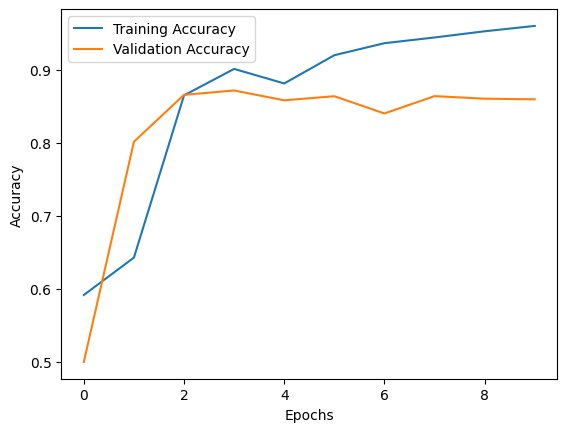

In [9]:
# 6. Visualizing Model Performance
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
# 7. Evaluating the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

313/313 [==============================] - 6s 20ms/step - loss: 0.4104 - accuracy: 0.8600
Test Accuracy: 0.86


In [24]:
# 8. Making Predictions
# We can use our model to predict the sentiment of new movie reviews.
sample_reviews = [
    "I absolutely loved this movie! The plot was thrilling and the characters were so well developed.",
    "The film was a disaster. Poor acting and a predictable storyline.",
    "the film was technically sound ok"
]

sample_sequences = tokenizer.texts_to_sequences(sample_reviews)
sample_padded = pad_sequences(sample_sequences, maxlen=200)

predictions = model.predict(sample_padded)
print(["Positive" if prob > 0.5 else "Negative" for prob in predictions])

1/1 [==============================] - 0s 29ms/step
['Positive', 'Negative', 'Negative']


# FIN